# In this notebook we did:
  - Correlation matrix (Interactive heatmap) for combined dataset of 1905 samples and 49 common proteins.


In [1]:
# Import the packages we may need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
import plotly.express as px

In [2]:
# Load the dataset
df = pd.read_csv('Combined_df2_imputedkNN.csv')
df

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0     Sample_ID Cancer    Q15389  \
0                0             0         0.0         PM910   Ctrl  10.12895   
1                1             1         1.0         PM396   Ctrl   8.67289   
2                2             2         2.0         PM190   Ctrl   9.99567   
3                3             3         3.0         PM270   Ctrl   8.26407   
4                4             4         4.0         PM656   Ctrl   9.08833   
...            ...           ...         ...           ...    ...       ...   
1900          1900           162         NaN  C29ZZ80Y4.01   HODG   9.87819   
1901          1901           163         NaN  C29ZS2ML8.01   HODG   9.42403   
1902          1902           164         NaN  C29ZFFZ0Q.01   HODG  10.26858   
1903          1903           165         NaN  C29ZQOG4N.01   HODG  10.15491   
1904          1904           166         NaN  C29ZPXKPU.01   HODG   9.91994   

       P29965   P49763   Q02763    P01127  ...   P09382   Q16790    P26842  \
0     5.62622  7.72902  8.47530  10.08926  ...  8.54519  4.20874  10.61404   
1     5.18821  8.25523  9.06271   8.89866  ...  8.25401  3.46839  10.77271   
2     6.38876  8.44263  8.42102  10.08508  ...  8.75887  4.65936  11.03062   
3     5.06228  8.13429  8.66165   8.75925  ...  8.75741  4.44633  10.47952   
4     5.95005  8.37830  8.29127   9.43936  ...  8.48018  3.81634  10.59295   
...       ...      ...      ...       ...  ...      ...      ...       ...   
1900  7.15139  7.71189  7.72042  10.23705  ...  7.19963  4.26576   7.80544   
1901  6.16559  7.48199  7.30005  10.14143  ...  6.90334  4.14795   7.74788   
1902  8.11759  7.78457  7.46200  10.25920  ...  6.69773  3.60838   7.67268   
1903  7.09910  7.78078  7.45732  10.27589  ...  7.01314  5.67411   8.44027   
1904  8.26728  8.24490  7.38531  10.22731  ...  7.15677  3.31914   7.24481   

       P14210   P43489   O75144   O43927   P32970   Q8WXI7   P10144  
0     8.37166  4.99296  7.78219  7.03584  4.81481  3.58965  4.13563  
1     8.36820  4.92422  7.47997  8.05700  3.98900  4.78155  3.14840  
2     9.18464  5.60743  7.92803  8.77261  4.80189  5.16350  4.29062  
3     8.65548  5.54289  9.29458  8.64028  4.04045  5.59217  3.75295  
4     8.63758  5.16271  7.41098  8.29143  4.59594  4.91665  4.10381  
...       ...      ...      ...      ...      ...      ...      ...  
1900  9.24521  5.59883  5.16395  9.03873  4.24414  1.53814  5.30002  
1901  8.80026  5.18470  7.53391  7.97077  3.84446  3.41778  3.84928  
1902  7.83666  5.35574  5.27098  7.55698  3.11025  1.56641  4.23022  
1903  8.79263  5.66616  7.99492  8.71554  5.02993  3.94930  4.90380  
1904  9.03534  5.98560  6.32338  8.23345  3.41871  2.53294  4.79012  

[1905 rows x 54 columns]

In [5]:
# compute the correlation matrix for the protein columns in your DataFrame
# Select only the numeric columns (proteins)
protein_cols = df.select_dtypes(include=['float64', 'int']).columns
correlation_matrix = df[protein_cols].corr()

#or can be used  "correlation_matrix = df.corr()", but it includes NaNs.

In [6]:
#Use Plotly to produce interactive heatmaps or scatter plots, 
#enable to zoom in on areas of interest and explore relationships more dynamically.

import plotly.express as px
import plotly.io as pio

#correlation_matrix = df.corr()



# Example for a heatmap using Plotly
fig = px.imshow(correlation_matrix, color_continuous_scale='Viridis', 
                labels=dict(x="Proteins", y="Proteins", color="Correlation"))




fig.update_layout(
    title={
        'text': "Correlation Matrix Interactive Heatmap",
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Anchor the title at the center
    },
        width=800,
        height=600
)
plt.savefig('Correlation_Matrix.png', format='png', dpi=300)  # Adjust dpi for resolution
fig.show()

<Figure size 640x480 with 0 Axes>

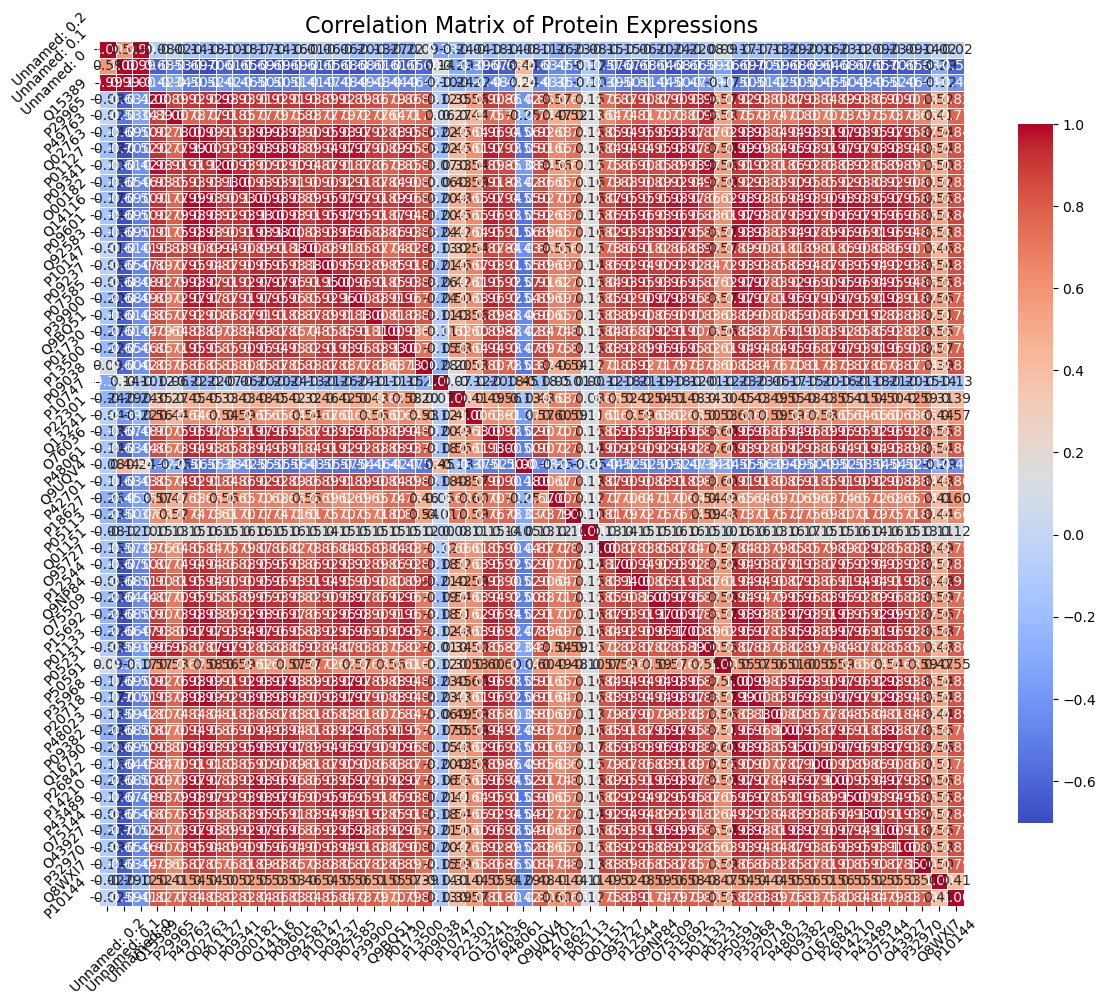

In [7]:
# visualize the correlation matrix using a heatmap from the seaborn library, 
#which provides a clear representation of the correlations.

# Set the size of the heatmap
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            cbar_kws={"shrink": .8}, linewidths=0.5)

# Add titles and labels
plt.title('Correlation Matrix of Protein Expressions', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.savefig('Correlation_Matrix2.png', format='png', dpi=300)  # Adjust dpi for resolution
plt.show()

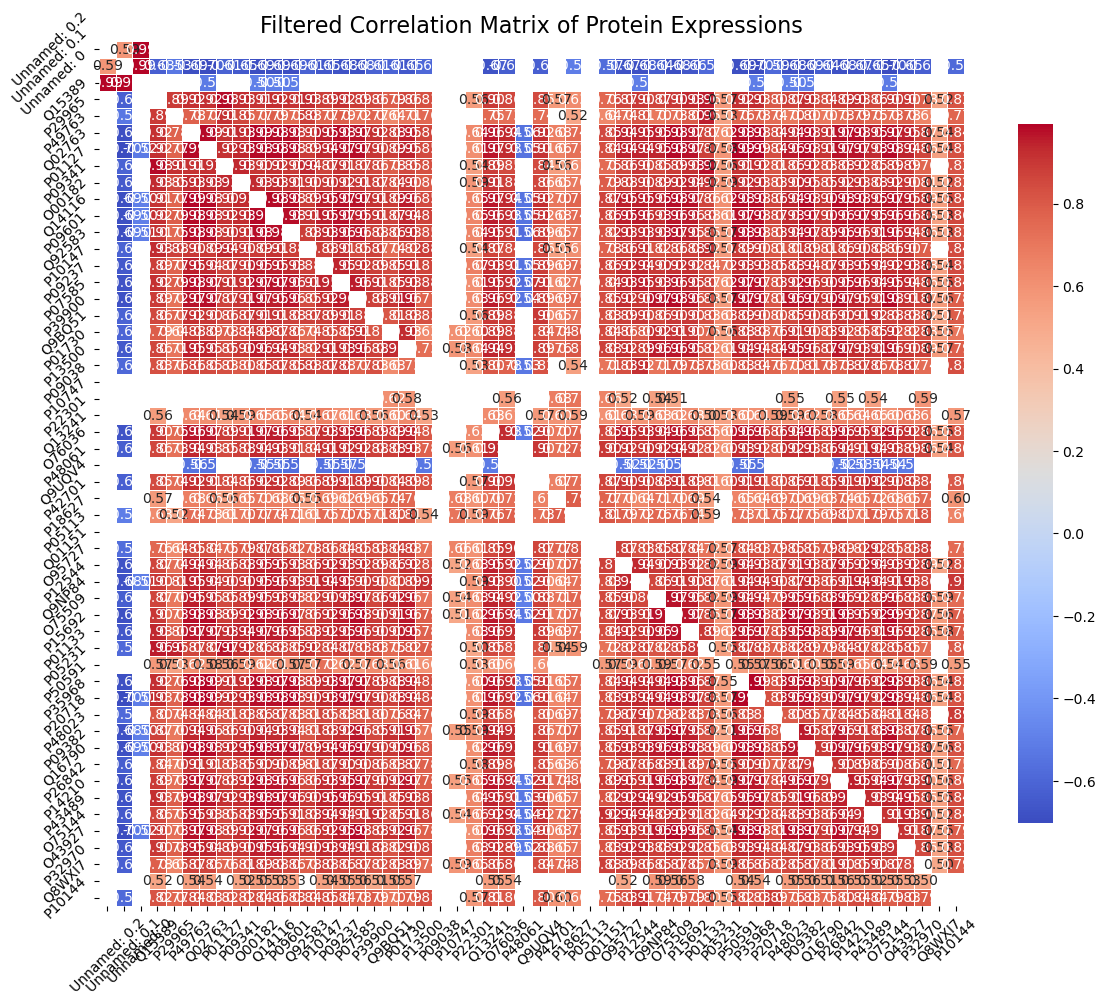

In [8]:
#to focus on proteins with a correlation above a certain threshold (e.g., > 0.5 or < -0.5), 
#filter the correlation matrix before visualization
# Filter the correlation matrix
threshold = 0.5
filtered_corr = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)]

# Visualize the filtered correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            cbar_kws={"shrink": .8}, linewidths=0.5)

plt.title('Filtered Correlation Matrix of Protein Expressions', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

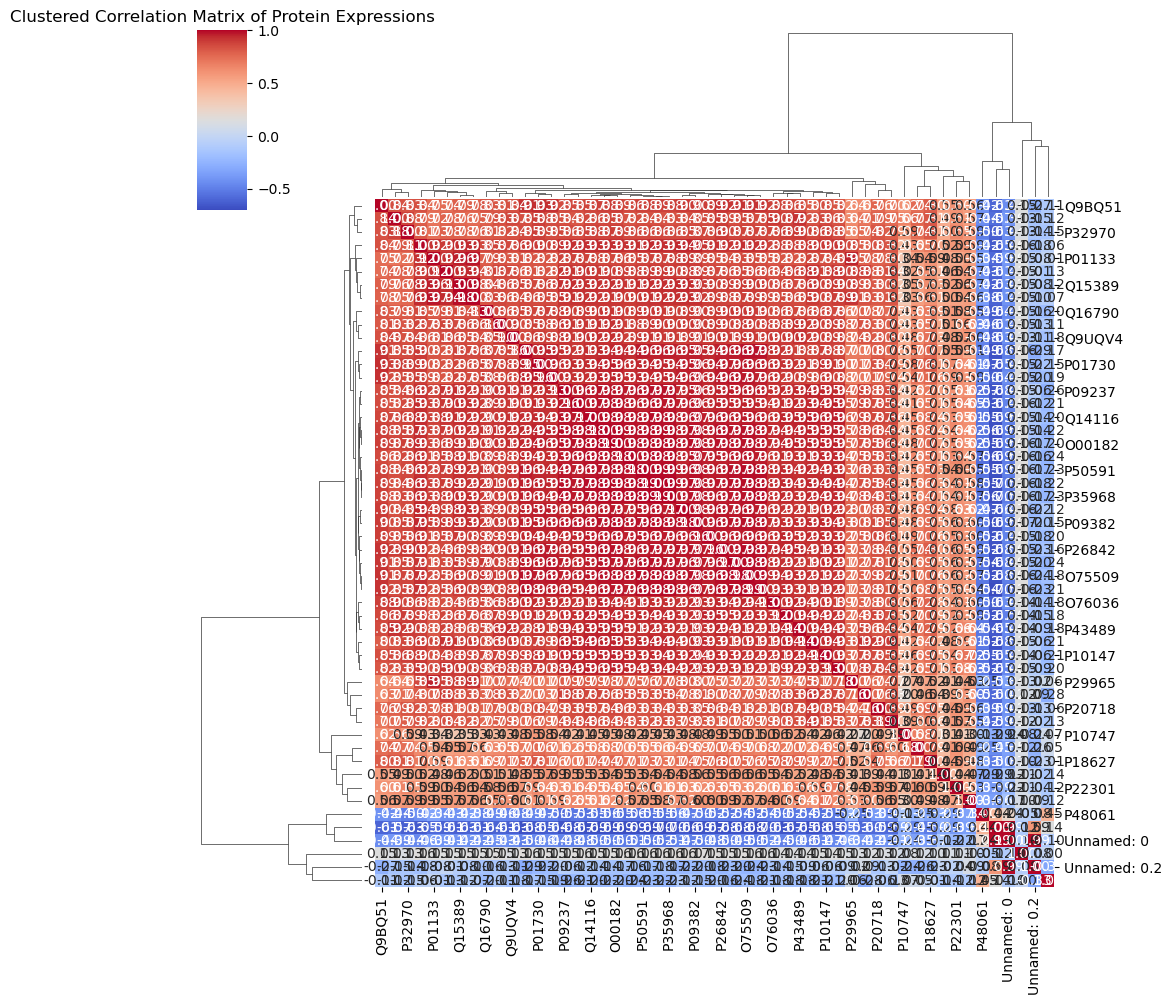

In [9]:
#Clustering the correlation matrix can group proteins with similar correlation patterns, 
#making the heatmap easier to read.

from scipy.cluster.hierarchy import linkage, dendrogram

# Compute a hierarchical clustering
linkage_matrix = linkage(correlation_matrix, method='average')

plt.figure(figsize=(10, 8))
sns.clustermap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
                figsize=(10, 10), row_linkage=linkage_matrix, col_linkage=linkage_matrix)
plt.title('Clustered Correlation Matrix of Protein Expressions')
plt.show()

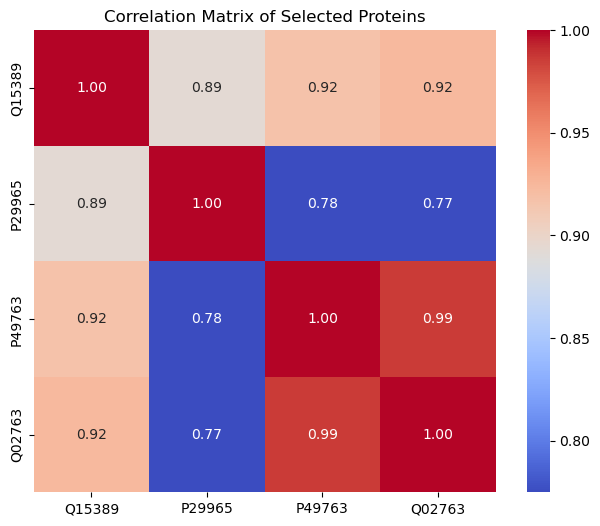

In [10]:
#Select a Subset of Proteins.certain proteins or groups, consider visualizing only those proteins.

# Example of selecting specific proteins
selected_proteins = ['Q15389', 'P29965', 'P49763', 'Q02763']  # Add your proteins of interest
correlation_matrix_subset = df[selected_proteins].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_subset, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Selected Proteins')
plt.show()